#  Introduction to Logistic Regression

**Logistic Regression** is a widely used supervised machine learning algorithm for classification problems. It is designed to model the probability that a given input belongs to a particular class.

Unlike **Linear Regression**, which predicts continuous values, **Logistic Regression** predicts **probabilities** of class membership and maps the output between **0 and 1** using the **sigmoid function**.


## Key Concepts

- **Classification**: Logistic regression is used when the output variable is categorical.
- **Sigmoid Function**: It transforms the linear output into probabilities.
  
### Logistic Regression Formula

The logistic (sigmoid) function is defined as:

\\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\\]

where:

\\[
z = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n
\\]

- \\( \sigma(z) \\) gives the **probability** that the input belongs to the positive class.
- The output of \\( \sigma(z) \\) always lies between **0 and 1**.


- **Decision Boundary**: Typically, a threshold of 0.5 is used. If the predicted probability is greater than 0.5, the instance is classified as class 1, otherwise as class 0.

## Use Cases

- Email spam detection (spam or not spam)
- Customer churn prediction (churn or not churn)
- Disease diagnosis (positive or negative)
- Multiclass problems using One-vs-Rest or Softmax (multinomial logistic regression)


## Advantages

- Easy to implement and interpret
- Works well for linearly separable data
- Outputs probabilities, which are useful for ranking

## Limitations

- Assumes linear relationship between features and the log-odds of the outcome
- Not ideal for very complex relationships or large datasets without regularization

 


In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model

# Load data
file_name = "Trash3.csv"
df = pd.read_csv(file_name)
df.head()

,Years,0,1,At25,Grand Total,PercentageOf
0,2008,13096.50000,4019.500000,1,17116.00000,30.691406
1,2009,13115.75315,3123.590378,0,16239.34353,23.815562
2,2010,13464.36703,3398.891248,1,16863.25828,25.243602
3,2011,13307.15248,3239.818533,0,16546.97101,24.346445
4,2012,13572.33000,4313.666667,1,17885.99667,31.782801


In [3]:
df.shape

(495, 6)

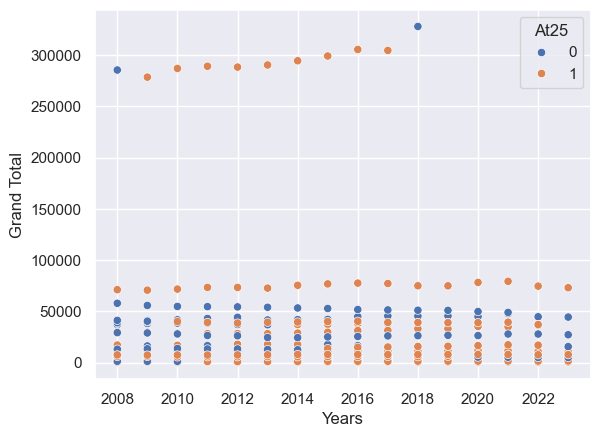

In [4]:
# Plotting our data
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.scatterplot(x="Years", y="Grand Total", hue="At25", data=df)

In [5]:
# Extract the columns we'll use for our data

x = df.iloc[:,np.r_[0, 3:4]].values 
y = df.iloc[:,3].values

In [6]:
# Split data into our test and training datasets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [7]:
# Fit (train) the Logistic Regression classifier
from sklearn.metrics import classification_report
clf = linear_model.LogisticRegression(C=0.001, solver='newton-cg')
fitted_model = clf.fit(X_train, Y_train)
predictions = fitted_model.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.18      0.31        83
           1       0.49      1.00      0.66        66

    accuracy                           0.54       149
   macro avg       0.75      0.59      0.48       149
weighted avg       0.78      0.54      0.46       149



In [9]:
# Predict based on height (inches) and weight (lbs)
year = 2009
totalWaste = 17000
import random
x = 0
# Get prediction
prediction = clf.predict([(year,totalWaste)])

if prediction[0]:
  result = "does meet the 25% recycling goal"
else:
  result = "does not mee the 25% recycling goal" 

print("This country " + result)

This country does meet the 25% recycling goal


### Displaying our theta parameter values

![alt text](https://miro.medium.com/max/2220/1*siWAvCzFy2zp81pDNoa4UA.png)

In [10]:
# We have 3 values of theta

# For theta_0:
print( fitted_model.intercept_ )

# For theta_1 and theta_2:
print( fitted_model.coef_ )

[-32.10778398]
[[0.01597991 0.08381859]]
